# Introdução

Este estudo tem por fim 

## Linear search

afdsfd

In [325]:
%%bash
cd benchmarks/linear_search
make
./main > out.csv
echo "-------------------"
cat out.csv

make -C ../lib/
make[1]: Entering directory '/home/srjheam/projects/ed/benchmarks/lib'
mkdir -p build/
ar rcs libbench.a build/vector.o build/profiler.o
make[1]: Leaving directory '/home/srjheam/projects/ed/benchmarks/lib'
gcc -o main main.c -L ../lib/ -lbench -Wall -Wall -Wextra -Werror -pedantic -ggdb3 -I../lib -lm
-------------------
N menor maior media 
1 0 3e-06 4.5e-07
2001 0 8e-06 3.935e-06
4001 0 1.7e-05 6.74e-06
6001 0 2.1e-05 9.56e-06
8001 0 4.9e-05 1.438e-05
10001 0 3.3e-05 1.6765e-05


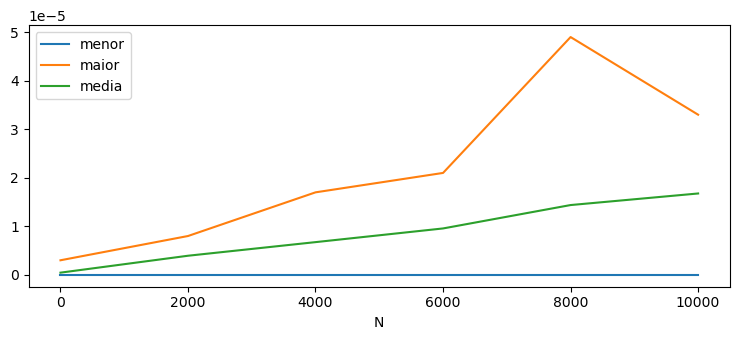

In [326]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

headers = ["N", "menor", "maior", "media"]

src = "benchmarks/linear_search/out.csv"

df = pd.read_csv(src, names=headers, delim_whitespace=True, skiprows=1)

# a coluna 'maior' pode ser removida do dataframe para analizar
# unicamente o comportamento linear da média
df.loc[:, df.columns.difference([])].set_index("N").plot()

plt.show()


## Binary Search

b

In [426]:
%%bash
cd benchmarks/binary_search
make
./main > out.csv
echo "-------------------"
cat out.csv

make -C ../lib/
make[1]: Entering directory '/home/srjheam/projects/ed/benchmarks/lib'
mkdir -p build/
ar rcs libbench.a build/vector.o build/profiler.o
make[1]: Leaving directory '/home/srjheam/projects/ed/benchmarks/lib'
gcc -o main main.c -L ../lib/ -lbench -Wall -Wall -Wextra -Werror -pedantic -ggdb3 -I../lib -lm
-------------------
N menor maior media 
1 0 1e-06 2.3e-07
201 0 1e-06 3.09e-07
401 0 1e-06 3.37e-07
601 0 1e-06 3.75e-07
801 0 1e-06 4.1e-07
1001 0 1e-06 4.33e-07
1201 0 1e-06 3.74e-07
1401 0 1e-06 4.1e-07
1601 0 1e-06 4.15e-07
1801 0 1e-06 3.77e-07
2001 0 2.3e-05 3.59e-07
2201 0 1e-06 4.27e-07
2401 0 1e-06 4.62e-07
2601 0 7.4e-05 4.17e-07
2801 0 1e-06 3.99e-07
3001 0 1e-06 1.6e-07
3201 0 1e-06 1.47e-07
3401 0 1e-06 9.3e-08
3601 0 1e-06 1.17e-07
3801 0 1e-06 1.75e-07
4001 0 3.7e-05 1.62e-07
4201 0 1e-06 1.66e-07
4401 0 1e-06 1.23e-07
4601 0 1e-06 1.11e-07
4801 0 1e-06 1.11e-07
5001 0 1e-06 1.31e-07
5201 0 1e-06 1.64e-07
5401 0 1.9e-05 1.57e-07
5601 0 1e-06 1.4e-07
5801 0 

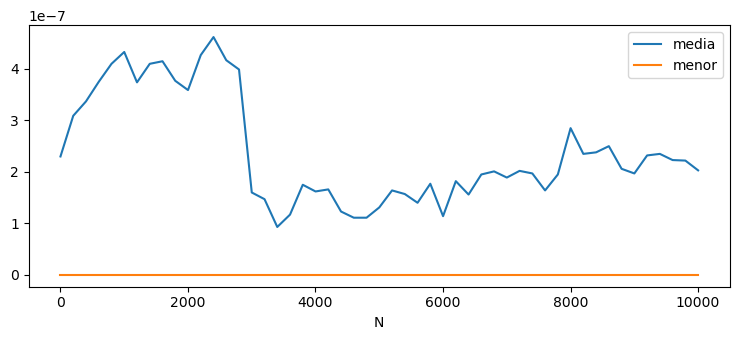

In [427]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

headers = ["N", "menor", "maior", "media"]

src = "benchmarks/binary_search/out.csv"

df = pd.read_csv(src, names=headers, delim_whitespace=True, skiprows=1)

# a coluna 'maior' pode ser removida do dataframe para analizar
# unicamente o comportamento linear da média
df.loc[:, df.columns.difference(['maior'])].set_index("N").plot()

plt.show()